In [17]:
#hp = hyperparameters[dataset]

#classes = hp['classes']

import pandas as pd
#import xlrd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.impute import KNNImputer
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
pd.DataFrame.iteritems=pd.DataFrame.items
# change the strings to ints]
#input= pd.DataFrame(pd.read_csv("US Insurance Claims Data.xlsx", encoding='utf-16-le', encoding_errors='ignore'))
input=pd.read_excel("US_Insurance_Claims_Data.xlsx")
input=input.fillna(method='bfill').fillna(method='ffill')

In [18]:
input.incident_location=input.incident_location.astype('category').cat.codes
input.policy_state=input.policy_state.astype('category').cat.codes
input.insured_education_level=input.insured_education_level.astype('category').cat.codes
input.insured_sex=input.insured_sex.astype('category').cat.codes
input.insured_hobbies=input.insured_hobbies.astype('category').cat.codes
input.insured_relationship=input.insured_relationship.astype('category').cat.codes
input.incident_type=input.incident_type.astype('category').cat.codes
input.collision_type=input.collision_type.astype('category').cat.codes
input.incident_severity=input.incident_severity.astype('category').cat.codes
input.authorities_contacted=input.authorities_contacted.astype('category').cat.codes
input.incident_state=input.incident_state.astype('category').cat.codes
input.incident_city=input.incident_city.astype('category').cat.codes
input.insured_occupation=input.insured_occupation.astype('category').cat.codes
input.property_damage=input.property_damage.astype('category').cat.codes
input.police_report_available=input.police_report_available.astype('category').cat.codes
input.auto_make=input.auto_make.astype('category').cat.codes
input.auto_model=input.auto_model.astype('category').cat.codes
#input['fraud_reported']=input['fraud_reported'].fillna(method='ffill').fillna(method='bfill')
input.fraud_reported=input.fraud_reported.astype('category').cat.codes
input.incident_date=input.incident_date.astype('category').cat.codes
input.policy_bind_date=input.incident_date.astype('category').cat.codes
input['policy_csl'] = input['policy_csl'].apply(lambda x: eval(x))

In [19]:
#img_rows, img_cols = 32, 32
#train_size = trainX.shape[0]

def KNN_impute(input, k):
    imputer = KNNImputer(n_neighbors=k)
    df_filled = imputer.fit_transform(input)
    matrix=pd.DataFrame(df_filled, columns=['months_as_customer', 'age', 'policy_number', 'policy_bind_date' , 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported'])
    #matrix = pd.DataFrame(df_filled, columns=['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', ])
    matrix.to_csv("DataKNN" +  str(k) + ".csv" )
    return matrix

In [20]:
import tensorflow as tf

In [31]:
# trainX,testX,trainY,testY=train_test_split(X_res,y_res,test_size=0.2)
#matrix=KNN_impute(input, 2)   
from tensorflow.keras.preprocessing.sequence import pad_sequences

#trainX_padded = pad_sequences(trainX, padding='post', truncating='post')
#testX_padded = pad_sequences(testX, padding='post', truncating='post')
#trainY_padded = pad_sequences(trainY, padding='post', truncating='post')
#testY_padded = pad_sequences(testY, padding='post', truncating='post')



grouped = input.groupby('months_as_customer')

# Extract sequences and labels
sequences = grouped.apply(lambda X: X[['months_as_customer', 'age', 'policy_number', 'policy_bind_date' , 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year']].values.tolist())
labels = grouped['fraud_reported'].first().values
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad to same length (post-padding with zeros)
X = pad_sequences(sequences.tolist(), padding='post', dtype='float32')
y = np.array(labels)




from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Flatten for oversampling

#X_resampled, y_resampled = ros.fit_resample(X_flat, y)
#
#X_resampled, y_resampled = sm.fit_resample(X_flat, y)


# Reshape back to 3D

X_flat = X.reshape((X.shape[0], -1))
#ros = RandomOverSampler(random_state=1)
ros=RandomUnderSampler(random_state=1000)
sm=SMOTE(random_state=1000)

X_resampled, y_resampled = sm.fit_resample(X_flat, y)
X_resampled, y_resampled = ros.fit_resample(X_resampled,  y_resampled)

X_resampled = X_resampled.reshape((-1, X.shape[1], X.shape[2]))

trainX,testX,trainY,testY=train_test_split((X_resampled), (y_resampled), test_size=0.2, random_state=1000)


#trainY = utils.to_categorical(trainY)
#testY = utils.to_categorical(testY)
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'top_k_categorical_accuracy'])
#csv_logger = CSVLogger(logfile, append=True, separator=';')





In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking
from sklearn.utils import class_weight
from tensorflow.keras.initializers import RandomNormal

optim_adam = tf.compat.v1.train.AdamOptimizer(0.1)



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking
from sklearn.utils import class_weight

optim_adam = tf.compat.v1.train.AdamOptimizer(0.1)







convex_loss_fn = tf.keras.losses.BinaryFocalCrossentropy(
    apply_class_balancing=False, alpha=0.25, gamma=0.0, from_logits=False,
    label_smoothing=0.0, axis=-1, reduction='sum_over_batch_size'
)


hybrid_convex_loss_fn = tf.keras.losses.BinaryFocalCrossentropy(
    apply_class_balancing=False, alpha=0.25, gamma=2.0, from_logits=False,
    label_smoothing=0.0, axis=-1, reduction='sum_over_batch_size'
)


nonconvex_loss_fn = tf.keras.losses.BinaryFocalCrossentropy(
    apply_class_balancing=False, alpha=0.25, gamma=8.0, from_logits=False,
    label_smoothing=0.0, axis=-1, reduction='sum_over_batch_size'
)


import tensorflow as tf
import tensorflow.keras.backend as K

class NoisyLossWrapper(tf.keras.losses.Loss):
    def __init__(self, base_loss_fn, noise_scale=0.5, name='noisy_loss'):
        super(NoisyLossWrapper, self).__init__(name=name)
        self.base_loss_fn = base_loss_fn
        self.noise_scale = noise_scale

    def call(self, y_true, y_pred):
        base_loss = self.base_loss_fn(y_true, y_pred)
        noise = tf.random.normal(shape=tf.shape(base_loss), mean=0.0, stddev=self.noise_scale)
        return base_loss + noise


nonconvex_focal_loss = NoisyLossWrapper(nonconvex_loss_fn, noise_scale=0.5)
convex_focal_loss = NoisyLossWrapper(convex_loss_fn, noise_scale=0.5)

#nonconvex_focal_loss = nonconvex_loss_fn
#convex_focal_loss = convex_loss_fn

In [44]:
class ConvexityRegularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, coeff=0.005):
        self.coeff = coeff

    def __call__(self, x):
        diff = x[:, 1:] - x[:, :-1]
        penalty = tf.nn.relu(-diff)
        return self.coeff * tf.reduce_sum(penalty)

    def get_config(self):
        return {"coeff": self.coeff}



def model_builder():
    model = tf.keras.Sequential([
        tf.keras.layers.Masking(mask_value=0.0, input_shape=(X.shape[1], X.shape[2])),
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model



convex_focal_loss = tf.keras.losses.BinaryFocalCrossentropy(
    apply_class_balancing=False, alpha=0.25, gamma=0.0, from_logits=False,
    label_smoothing=0.0, axis=-1, reduction='sum_over_batch_size'
)
convex_focal_loss.__name__ = "convex_focal_loss"

nonconvex_focal_loss = tf.keras.losses.BinaryFocalCrossentropy(
    apply_class_balancing=False, alpha=0.25, gamma=8.0, from_logits=False,
    label_smoothing=0.0, axis=-1, reduction='sum_over_batch_size'
)
nonconvex_focal_loss.__name__ = "nonconvex_focal_loss"

training_schedule_convex = [
    {"loss_fn": convex_focal_loss, "epochs": 100},
]

training_schedule_multistage = [
    {"loss_fn": convex_focal_loss, "epochs": 15},
    {"loss_fn": nonconvex_focal_loss, "epochs": 95},
]

training_schedule_nonconvex = [
    {"loss_fn": nonconvex_focal_loss, "epochs": 100},
]


from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import f1_score

def train_with_schedule(schedule, schedule_name):
    print(f"\n🚀 Training schedule: {schedule_name}")
    
    model = model_builder()
    
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.0001,
        decay_steps=1000,
        decay_rate=0.9,
        staircase=True
    )
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    
    current_epoch = 0
    
    for i, stage in enumerate(schedule):
        loss_fn = stage["loss_fn"]
        epochs = stage["epochs"]
        print(f"\n➡️ Stage {i + 1} | Epochs: {epochs} | Loss: {loss_fn.__name__}")

        model.compile(
            optimizer=optimizer,
            loss=loss_fn,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
        )

        model.fit(
            trainX, trainY,
            initial_epoch=current_epoch,
            epochs=current_epoch + epochs,
            batch_size=1,
            validation_data=(testX, testY),
            verbose=1
        )
        current_epoch += epochs
    
    # Evaluate on test data (accuracy, precision, recall)
    eval_results = model.evaluate(testX, testY, verbose=0)
    loss = eval_results[0]
    accuracy = eval_results[1]
    precision = eval_results[2]
    recall = eval_results[3]

    # Predict and compute F1 score
    y_pred_prob = model.predict(testX)
    y_pred = (y_pred_prob > 0.5).astype(int)
    f1 = f1_score(testY, y_pred)

    print(f"\n🎯 Finished schedule '{schedule_name}' with test loss: {loss:.4f}, "
          f"accuracy: {accuracy:.4f}, precision: {precision:.4f}, recall: {recall:.4f}, f1-score: {f1:.4f}")

    # ✅ SHAP explanation (computed after training)
    try:
        print("🔍 Computing SHAP values...")
        background = trainX[np.random.choice(trainX.shape[0], 100, replace=False)]  # Sampled for efficiency
        explainer = shap.GradientExplainer(model, background)
        shap_values = explainer.shap_values(testX[:100])  # Limit size for performance
        print("✅ SHAP values computed.")
    except Exception as e:
        print(f"⚠️ SHAP computation failed: {e}")
        shap_values = None

    return {
        "loss": loss,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "shap_values": shap_values
    }


🚀 Training schedule: Convex Only



➡️ Stage 1 | Epochs: 100 | Loss: convex_focal_loss
Epoch 1/100
633/633 [==============================] - 7s 8ms/step - loss: 0.7020 - accuracy: 0.5371 - precision: 0.5286 - recall: 0.7003 - val_loss: 0.6662 - val_accuracy: 0.5786 - val_precision: 0.5714 - val_recall: 0.6076
Epoch 2/100
633/633 [==============================] - 5s 7ms/step - loss: 0.6833 - accuracy: 0.5845 - precision: 0.6071 - recall: 0.4826 - val_loss: 0.6981 - val_accuracy: 0.5597 - val_precision: 0.6452 - val_recall: 0.2532
Epoch 3/100
633/633 [==============================] - 5s 7ms/step - loss: 0.6745 - accuracy: 0.5845 - precision: 0.6421 - recall: 0.3849 - val_loss: 0.6728 - val_accuracy: 0.5849 - val_precision: 0.6512 - val_recall: 0.3544
Epoch 4/100
633/633 [==============================] - 5s 7ms/step - loss: 0.6714 - accuracy: 0.5956 - precision: 0.6805 - recall: 0.3628 - val_loss: 0.6790 - val_accuracy: 0.6226 - val_precision: 0.8065 - val_recall: 0.3165
Epoch 5/100
633/633 [===========================

/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


✅ SHAP values computed.

🚀 Training schedule: Multistage



➡️ Stage 1 | Epochs: 15 | Loss: convex_focal_loss
Epoch 1/15
633/633 [==============================] - 7s 9ms/step - loss: 0.7077 - accuracy: 0.5276 - precision: 0.5429 - recall: 0.3596 - val_loss: 0.7073 - val_accuracy: 0.5157 - val_precision: 0.5152 - val_recall: 0.4304
Epoch 2/15
633/633 [==============================] - 5s 8ms/step - loss: 0.6865 - accuracy: 0.5434 - precision: 0.5574 - recall: 0.4290 - val_loss: 0.7134 - val_accuracy: 0.5157 - val_precision: 0.5128 - val_recall: 0.5063
Epoch 3/15
633/633 [==============================] - 5s 8ms/step - loss: 0.6820 - accuracy: 0.5545 - precision: 0.5593 - recall: 0.5205 - val_loss: 0.7042 - val_accuracy: 0.4906 - val_precision: 0.4828 - val_recall: 0.3544
Epoch 4/15
633/633 [==============================] - 5s 8ms/step - loss: 0.6752 - accuracy: 0.5750 - precision: 0.5828 - recall: 0.5331 - val_loss: 0.6988 - val_accuracy: 0.5157 - val_precision: 0.5132 - val_recall: 0.4937
Epoch 5/15
633/633 [==============================] -


➡️ Stage 2 | Epochs: 95 | Loss: nonconvex_focal_loss
Epoch 16/110
633/633 [==============================] - 6s 8ms/step - loss: 0.0059 - accuracy: 0.5829 - precision: 0.5936 - recall: 0.5300 - val_loss: 0.0043 - val_accuracy: 0.5660 - val_precision: 0.5758 - val_recall: 0.4810
Epoch 17/110
633/633 [==============================] - 5s 7ms/step - loss: 0.0046 - accuracy: 0.6367 - precision: 0.6381 - recall: 0.6341 - val_loss: 0.0041 - val_accuracy: 0.5786 - val_precision: 0.5732 - val_recall: 0.5949
Epoch 18/110
633/633 [==============================] - 5s 7ms/step - loss: 0.0046 - accuracy: 0.6145 - precision: 0.6083 - recall: 0.6467 - val_loss: 0.0048 - val_accuracy: 0.5786 - val_precision: 0.5652 - val_recall: 0.6582
Epoch 19/110
633/633 [==============================] - 5s 7ms/step - loss: 0.0048 - accuracy: 0.5877 - precision: 0.5838 - recall: 0.6151 - val_loss: 0.0042 - val_accuracy: 0.5409 - val_precision: 0.5357 - val_recall: 0.5696
Epoch 20/110
633/633 [====================

/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


✅ SHAP values computed.

🚀 Training schedule: Nonconvex Only



➡️ Stage 1 | Epochs: 100 | Loss: nonconvex_focal_loss
Epoch 1/100
633/633 [==============================] - 7s 9ms/step - loss: 0.0076 - accuracy: 0.5166 - precision: 0.5137 - recall: 0.6498 - val_loss: 0.0046 - val_accuracy: 0.5660 - val_precision: 0.5595 - val_recall: 0.5949
Epoch 2/100
633/633 [==============================] - 5s 8ms/step - loss: 0.0051 - accuracy: 0.5166 - precision: 0.5196 - recall: 0.4606 - val_loss: 0.0040 - val_accuracy: 0.5912 - val_precision: 0.6029 - val_recall: 0.5190
Epoch 3/100
633/633 [==============================] - 5s 7ms/step - loss: 0.0047 - accuracy: 0.4834 - precision: 0.4823 - recall: 0.4290 - val_loss: 0.0045 - val_accuracy: 0.5157 - val_precision: 0.5172 - val_recall: 0.3797
Epoch 4/100
633/633 [==============================] - 5s 7ms/step - loss: 0.0043 - accuracy: 0.5103 - precision: 0.5125 - recall: 0.4511 - val_loss: 0.0042 - val_accuracy: 0.5283 - val_precision: 0.5278 - val_recall: 0.4810
Epoch 5/100
633/633 [========================

/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


✅ SHAP values computed.


/var/folders/ql/5nmrkn3145n9_pzr7h7w7_gh0000gn/T/ipykernel_30863/2641176262.py:55: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


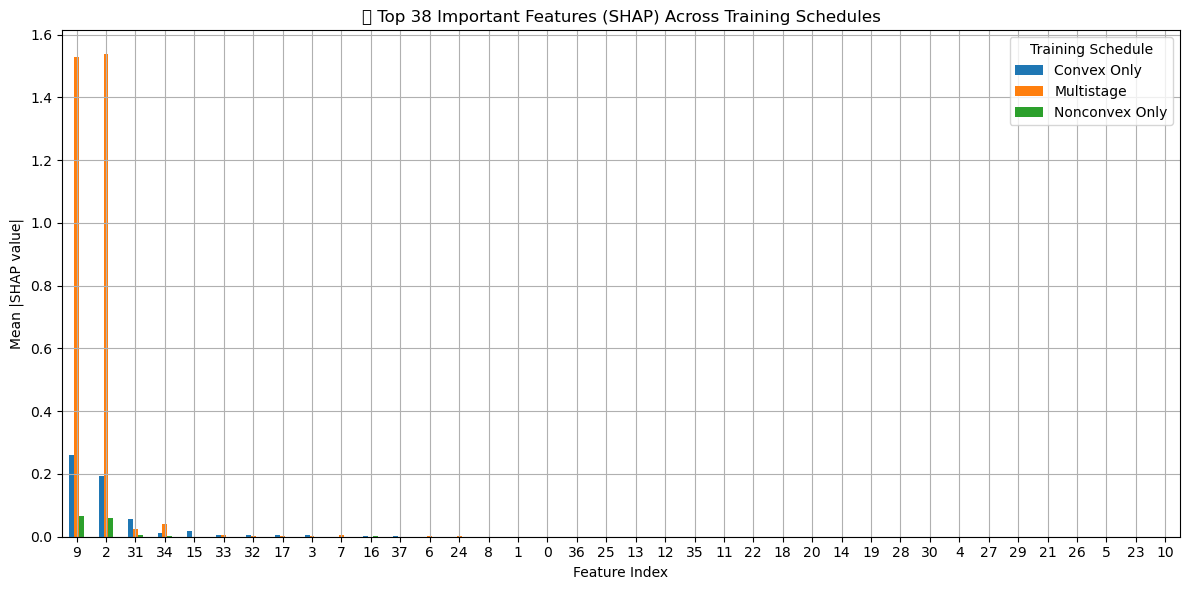

In [45]:
import shap
import matplotlib.pyplot as plt

#results = {}

results["Convex Only"] = train_with_schedule(training_schedule_convex, "Convex Only")
results["Multistage"] = train_with_schedule(training_schedule_multistage, "Multistage")
results["Nonconvex Only"] = train_with_schedule(training_schedule_nonconvex, "Nonconvex Only")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define number of top features to compare
TOP_K = 38

# Store aggregated SHAP values per schedule
shap_feature_importance = {}

for name, metrics in results.items():
    shap_values = metrics.get("shap_values", None)

    if shap_values is not None:
        try:
            # Transpose to (samples, time_steps, features)
            reshaped_shap = np.transpose(shap_values[0], (2, 0, 1))  # (1, 51, 38)
            repeated_shap = np.repeat(reshaped_shap, 100, axis=0)    # (100, 51, 38)
            mean_abs_shap = np.mean(np.abs(repeated_shap), axis=(0, 1))  # (features,)

            shap_feature_importance[name] = mean_abs_shap

        except Exception as e:
            print(f"❌ Failed to process SHAP values for {name}: {e}")
    else:
        print(f"⚠️ No SHAP values for {name}")

# Combine into DataFrame for comparison
df_importance = pd.DataFrame(shap_feature_importance)

# Optional: rename columns to feature names if you have them, e.g., feature_names = ['f1', ..., 'f38']
# df_importance.index = feature_names

# Get top K features by mean importance across all models
top_features = df_importance.mean(axis=1).nlargest(TOP_K).index
df_top = df_importance.loc[top_features]

# Plot
df_top.plot(kind='bar', figsize=(12, 6))
plt.title(f"🔍 Top {TOP_K} Important Features (SHAP) Across Training Schedules")
plt.ylabel("Mean |SHAP value|")
plt.xlabel("Feature Index")
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title="Training Schedule")
plt.tight_layout()
plt.show()

In [11]:
shap_values[0].shape

(51, 38, 1)

In [12]:
testX[:100].shape

(100, 51, 38)